Task-1

In [18]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [10]:
customers_data= pd.read_csv("Customers.csv")
products_data= pd.read_csv("Products.csv")
transactions_data= pd.read_csv("Transactions.csv")

In [8]:
customers_data.head(5)

,CustomerID,CustomerName,Region,SignupDate
0,C0001,Lawrence Carroll,South America,2022-07-10
1,C0002,Elizabeth Lutz,Asia,2022-02-13
2,C0003,Michael Rivera,South America,2024-03-07
3,C0004,Kathleen Rodriguez,South America,2022-10-09
4,C0005,Laura Weber,Asia,2022-08-15


In [11]:
products_data.head(5)

,ProductID,ProductName,Category,Price
0,P001,ActiveWear Biography,Books,169.30
1,P002,ActiveWear Smartwatch,Electronics,346.30
2,P003,ComfortLiving Biography,Books,44.12
3,P004,BookWorld Rug,Home Decor,95.69
4,P005,TechPro T-Shirt,Clothing,429.31


In [12]:
transactions_data.head(5)

,TransactionID,CustomerID,ProductID,TransactionDate,Quantity,TotalValue,Price
0,T00001,C0199,P067,2024-08-25 12:38:23,1,300.68,300.68
1,T00112,C0146,P067,2024-05-27 22:23:54,1,300.68,300.68
2,T00166,C0127,P067,2024-04-25 07:38:55,1,300.68,300.68
3,T00272,C0087,P067,2024-03-26 22:55:37,2,601.36,300.68
4,T00363,C0070,P067,2024-03-21 15:10:10,3,902.04,300.68


In [9]:
customers_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   CustomerID    200 non-null    object
 1   CustomerName  200 non-null    object
 2   Region        200 non-null    object
 3   SignupDate    200 non-null    object
dtypes: object(4)
memory usage: 6.4+ KB


In [13]:
products_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   ProductID    100 non-null    object 
 1   ProductName  100 non-null    object 
 2   Category     100 non-null    object 
 3   Price        100 non-null    float64
dtypes: float64(1), object(3)
memory usage: 3.3+ KB


In [14]:
transactions_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   TransactionID    1000 non-null   object 
 1   CustomerID       1000 non-null   object 
 2   ProductID        1000 non-null   object 
 3   TransactionDate  1000 non-null   object 
 4   Quantity         1000 non-null   int64  
 5   TotalValue       1000 non-null   float64
 6   Price            1000 non-null   float64
dtypes: float64(2), int64(1), object(4)
memory usage: 54.8+ KB


In [25]:
def basic_info(df, name):
    print(f"--- {name} ---")
    print("Shape:", df.shape)
    print("Columns:", df.columns.tolist())
    print("Missing Values:\n", df.isnull().sum())
    print("Data Types:\n", df.dtypes)
    print("Sample Data:\n", df.head())
    print("-----------------------------\n")

In [26]:
basic_info(customers_data, "Customers Data")
basic_info(transactions_data, "Transactions Data")
basic_info(products_data, "Products Data")

--- Customers Data ---
Shape: (200, 4)
Columns: ['CustomerID', 'CustomerName', 'Region', 'SignupDate']
Missing Values:
 CustomerID      0
CustomerName    0
Region          0
SignupDate      0
dtype: int64
Data Types:
 CustomerID              object
CustomerName            object
Region                  object
SignupDate      datetime64[ns]
dtype: object
Sample Data:
   CustomerID        CustomerName         Region SignupDate
0      C0001    Lawrence Carroll  South America 2022-07-10
1      C0002      Elizabeth Lutz           Asia 2022-02-13
2      C0003      Michael Rivera  South America 2024-03-07
3      C0004  Kathleen Rodriguez  South America 2022-10-09
4      C0005         Laura Weber           Asia 2022-08-15
-----------------------------

--- Transactions Data ---
Shape: (1000, 7)
Columns: ['TransactionID', 'CustomerID', 'ProductID', 'TransactionDate', 'Quantity', 'TotalValue', 'Price']
Missing Values:
 TransactionID      0
CustomerID         0
ProductID          0
TransactionDat

In [27]:
# Check for duplicates in the datasets
print("Duplicates in Customers Data:", customers_data.duplicated().sum())
print("Duplicates in Transactions Data:", transactions_data.duplicated().sum())
print("Duplicates in Products Data:", products_data.duplicated().sum())


Duplicates in Customers Data: 0
Duplicates in Transactions Data: 0
Duplicates in Products Data: 0


In [28]:
# Statistical summary of numeric columns
print("Statistical Summary - Transactions Data:")
print(transactions_data.describe())
print("Statistical Summary - Products Data:")
print(products_data.describe())

Statistical Summary - Transactions Data:
                     TransactionDate     Quantity   TotalValue       Price
count                           1000  1000.000000  1000.000000  1000.00000
mean   2024-06-23 15:33:02.768999936     2.537000   689.995560   272.55407
min              2023-12-30 15:29:12     1.000000    16.080000    16.08000
25%       2024-03-25 22:05:34.500000     2.000000   295.295000   147.95000
50%       2024-06-26 17:21:52.500000     3.000000   588.880000   299.93000
75%              2024-09-19 14:19:57     4.000000  1011.660000   404.40000
max              2024-12-28 11:00:00     4.000000  1991.040000   497.76000
std                              NaN     1.117981   493.144478   140.73639
Statistical Summary - Products Data:
            Price
count  100.000000
mean   267.551700
std    143.219383
min     16.080000
25%    147.767500
50%    292.875000
75%    397.090000
max    497.760000


In [15]:
customers_data['SignupDate'] = pd.to_datetime(customers_data['SignupDate'])
transactions_data['TransactionDate'] = pd.to_datetime(transactions_data['TransactionDate'])

In [16]:
merged_data = pd.merge(transactions_data, customers_data, on='CustomerID')
merged_data = pd.merge(merged_data, products_data, on='ProductID')

# Basic statistics
print(merged_data.describe())

                     TransactionDate     Quantity   TotalValue     Price_x  \
count                           1000  1000.000000  1000.000000  1000.00000   
mean   2024-06-23 15:33:02.768999936     2.537000   689.995560   272.55407   
min              2023-12-30 15:29:12     1.000000    16.080000    16.08000   
25%       2024-03-25 22:05:34.500000     2.000000   295.295000   147.95000   
50%       2024-06-26 17:21:52.500000     3.000000   588.880000   299.93000   
75%              2024-09-19 14:19:57     4.000000  1011.660000   404.40000   
max              2024-12-28 11:00:00     4.000000  1991.040000   497.76000   
std                              NaN     1.117981   493.144478   140.73639   

                          SignupDate     Price_y  
count                           1000  1000.00000  
mean   2023-07-09 02:49:55.199999744   272.55407  
min              2022-01-22 00:00:00    16.08000  
25%              2022-09-17 12:00:00   147.95000  
50%              2023-07-23 00:00:00   299

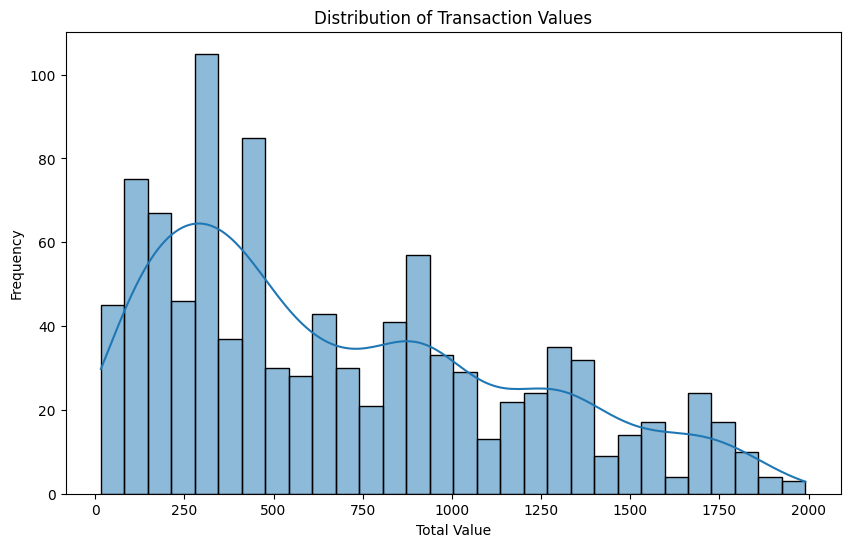

In [19]:
# Visualize the distribution of transaction values
plt.figure(figsize=(10, 6))
sns.histplot(merged_data['TotalValue'], bins=30, kde=True)
plt.title('Distribution of Transaction Values')
plt.xlabel('Total Value')
plt.ylabel('Frequency')
plt.show()

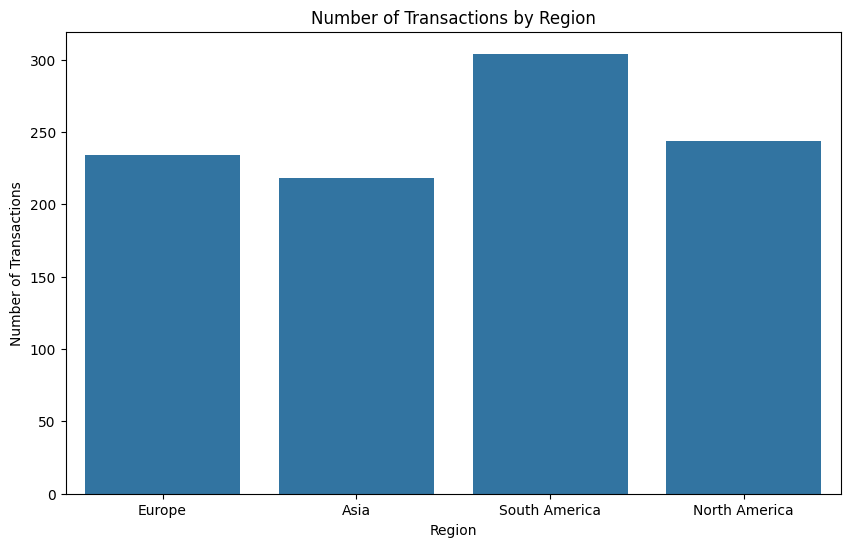

In [20]:
# Visualize the number of transactions by region
plt.figure(figsize=(10, 6))
sns.countplot(data=merged_data, x='Region')
plt.title('Number of Transactions by Region')
plt.xlabel('Region')
plt.ylabel('Number of Transactions')
plt.show()

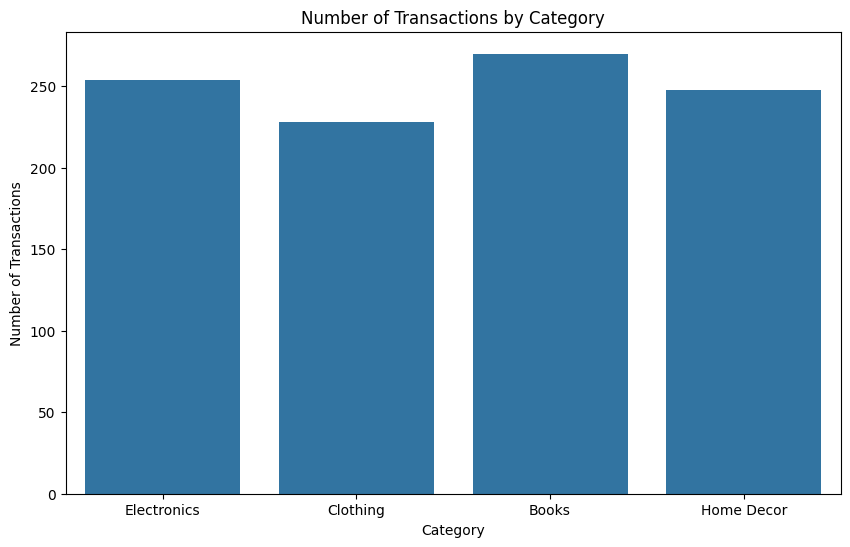

In [21]:
# Visualize the number of transactions by category
plt.figure(figsize=(10, 6))
sns.countplot(data=merged_data, x='Category')
plt.title('Number of Transactions by Category')
plt.xlabel('Category')
plt.ylabel('Number of Transactions')
plt.show()

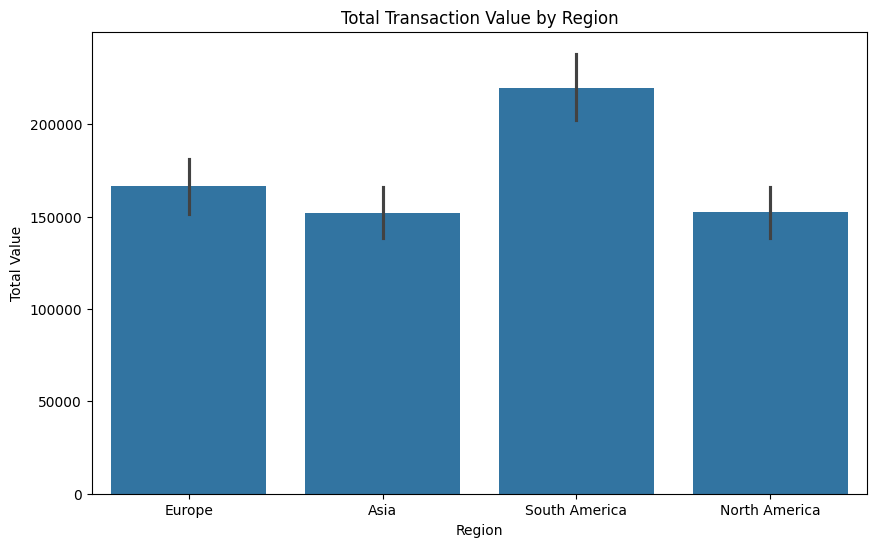

In [22]:
# Visualize the total transaction value by region
plt.figure(figsize=(10, 6))
sns.barplot(data=merged_data, x='Region', y='TotalValue', estimator=sum)
plt.title('Total Transaction Value by Region')
plt.xlabel('Region')
plt.ylabel('Total Value')
plt.show()


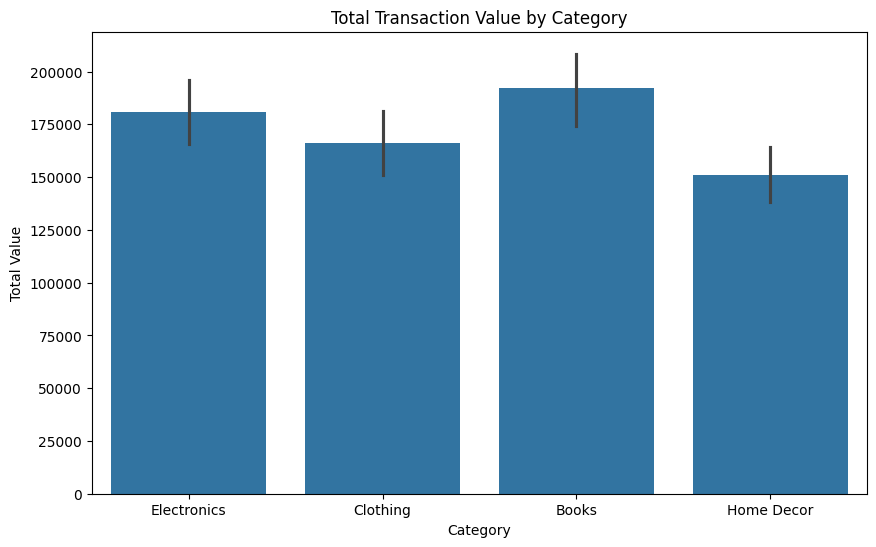

In [23]:
# Visualize the total transaction value by category
plt.figure(figsize=(10, 6))
sns.barplot(data=merged_data, x='Category', y='TotalValue', estimator=sum)
plt.title('Total Transaction Value by Category')
plt.xlabel('Category')
plt.ylabel('Total Value')
plt.show()

In [29]:
merged_data = pd.merge(transactions_data, customers_data, on="CustomerID", how="left")
merged_data = pd.merge(merged_data, products_data, on="ProductID", how="left")

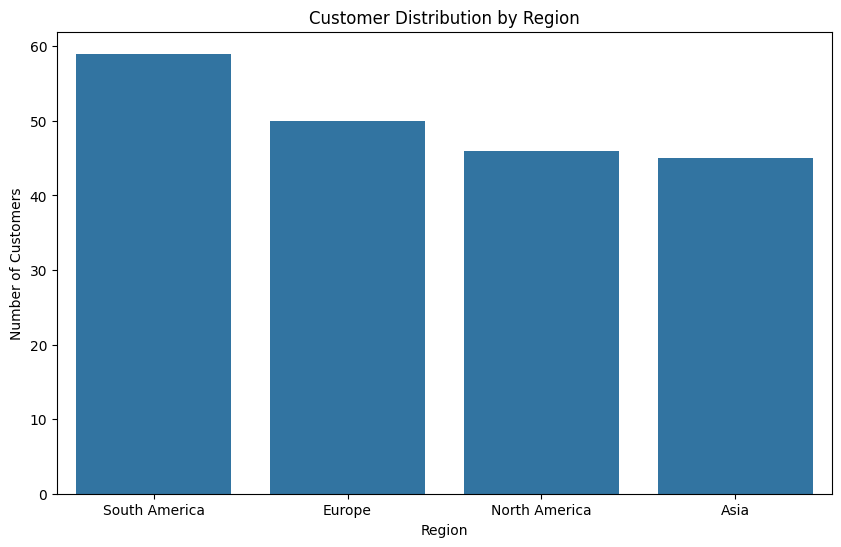

In [30]:
# 1. Region-wise customer distribution
plt.figure(figsize=(10, 6))
sns.countplot(data=customers_data, x="Region", order=customers_data["Region"].value_counts().index)
plt.title("Customer Distribution by Region")
plt.xlabel("Region")
plt.ylabel("Number of Customers")
plt.show()

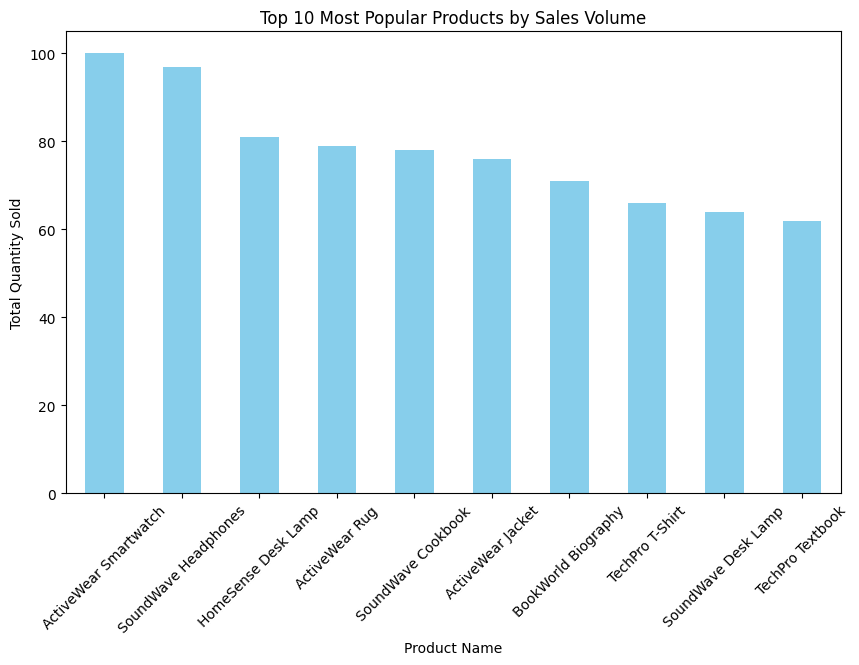

In [31]:
# 2. Most popular products by sales volume
popular_products = merged_data.groupby("ProductName")["Quantity"].sum().sort_values(ascending=False).head(10)
plt.figure(figsize=(10, 6))
popular_products.plot(kind='bar', color='skyblue')
plt.title("Top 10 Most Popular Products by Sales Volume")
plt.xlabel("Product Name")
plt.ylabel("Total Quantity Sold")
plt.xticks(rotation=45)
plt.show()


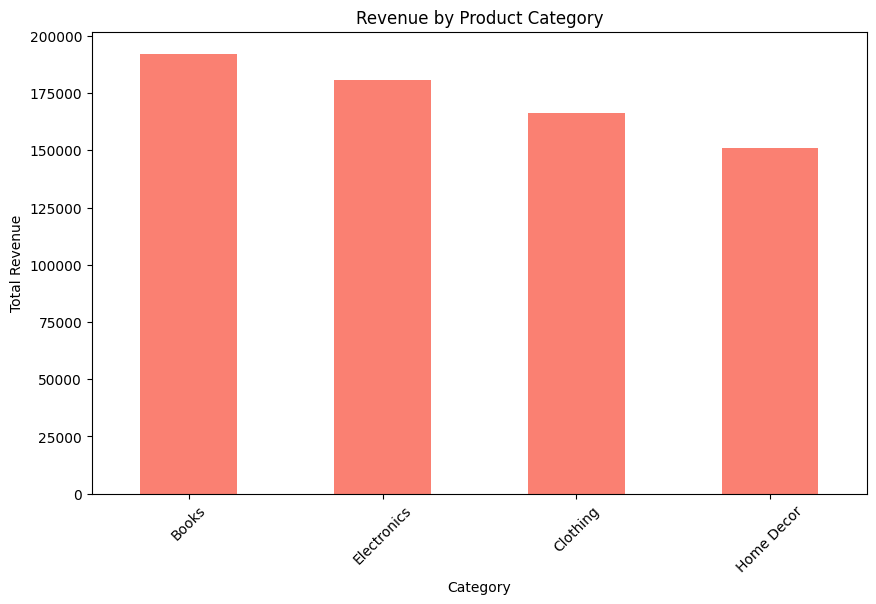

In [32]:
# 3. Revenue contribution by product categories
category_revenue = merged_data.groupby("Category")["TotalValue"].sum().sort_values(ascending=False)
plt.figure(figsize=(10, 6))
category_revenue.plot(kind='bar', color='salmon')
plt.title("Revenue by Product Category")
plt.xlabel("Category")
plt.ylabel("Total Revenue")
plt.xticks(rotation=45)
plt.show()

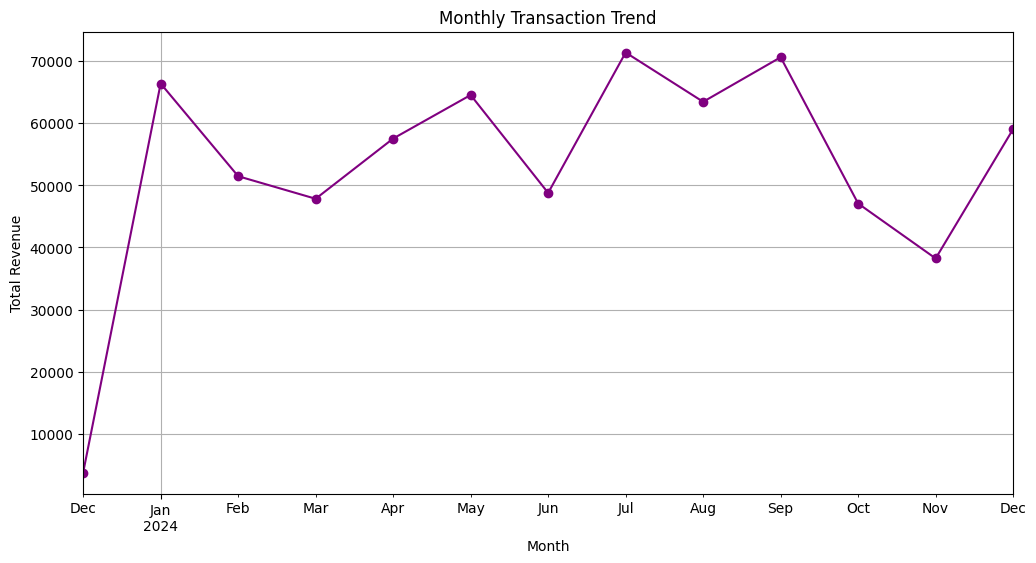

In [33]:
# 4. Monthly transaction trend
merged_data['TransactionMonth'] = pd.to_datetime(merged_data['TransactionDate']).dt.to_period('M')
monthly_trend = merged_data.groupby("TransactionMonth")["TotalValue"].sum()
plt.figure(figsize=(12, 6))
monthly_trend.plot(kind='line', marker='o', color='purple')
plt.title("Monthly Transaction Trend")
plt.xlabel("Month")
plt.ylabel("Total Revenue")
plt.grid()
plt.show()


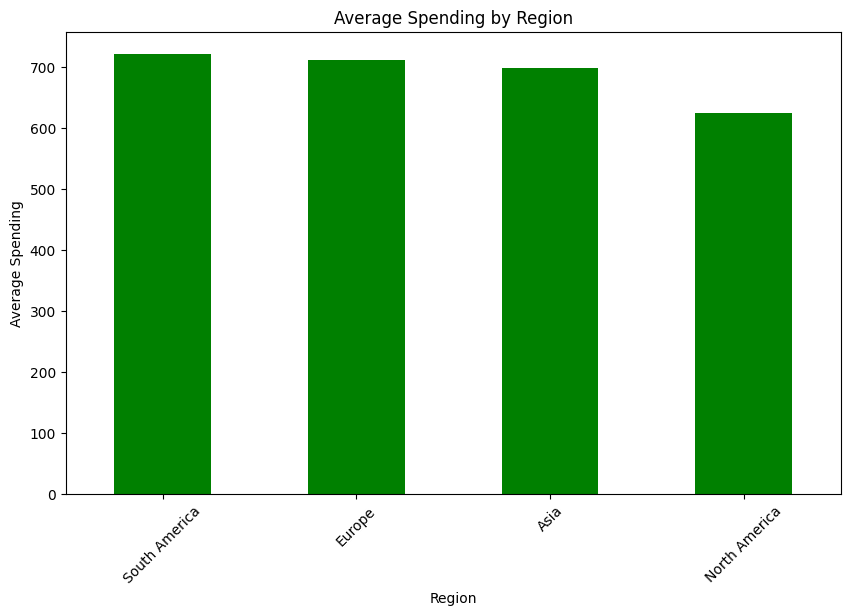

In [34]:
# 5. Average spending by region
region_spending = merged_data.groupby("Region")["TotalValue"].mean().sort_values(ascending=False)
plt.figure(figsize=(10, 6))
region_spending.plot(kind='bar', color='green')
plt.title("Average Spending by Region")
plt.xlabel("Region")
plt.ylabel("Average Spending")
plt.xticks(rotation=45)
plt.show()

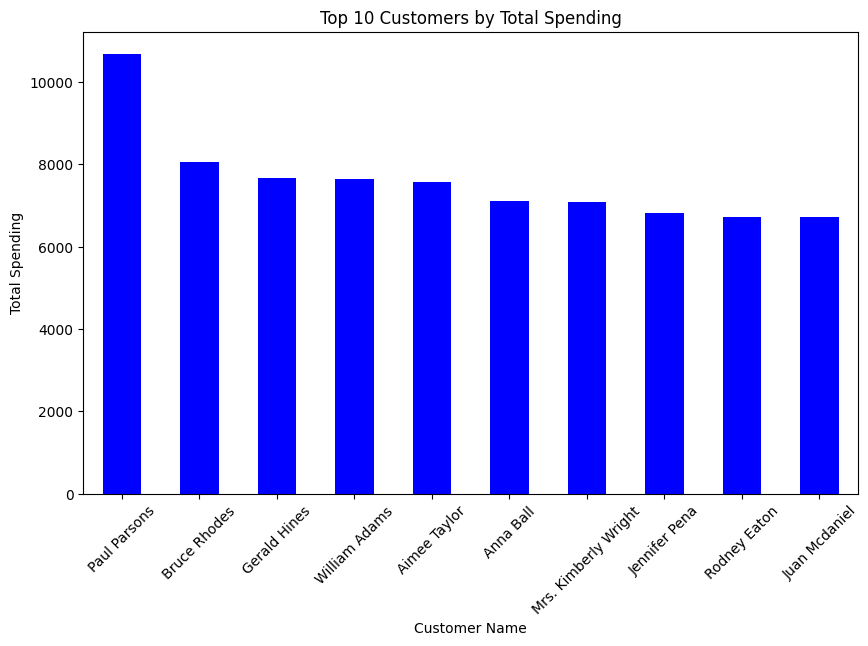

In [35]:
# 6. Top customers by total spending
top_customers = merged_data.groupby("CustomerName")["TotalValue"].sum().sort_values(ascending=False).head(10)
plt.figure(figsize=(10, 6))
top_customers.plot(kind='bar', color='blue')
plt.title("Top 10 Customers by Total Spending")
plt.xlabel("Customer Name")
plt.ylabel("Total Spending")
plt.xticks(rotation=45)
plt.show()


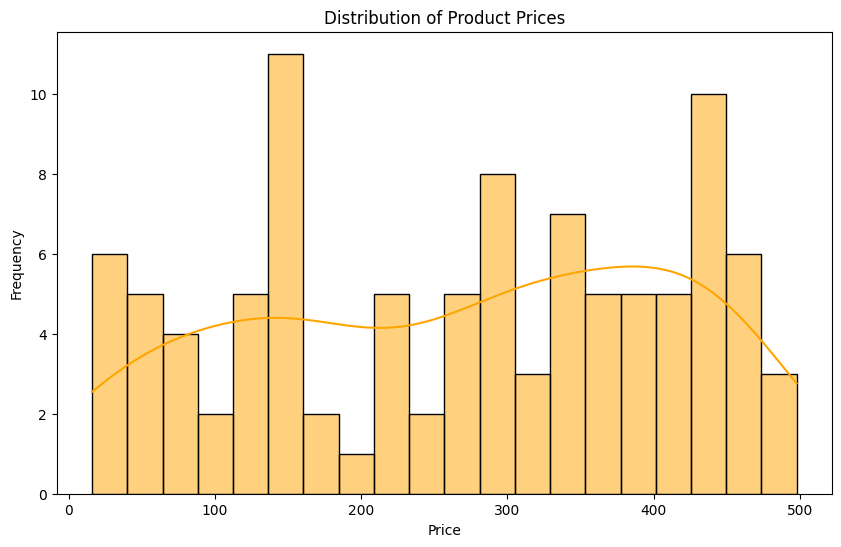

In [36]:
# 7. Distribution of product prices
plt.figure(figsize=(10, 6))
sns.histplot(products_data['Price'], bins=20, kde=True, color='orange')
plt.title("Distribution of Product Prices")
plt.xlabel("Price")
plt.ylabel("Frequency")
plt.show()

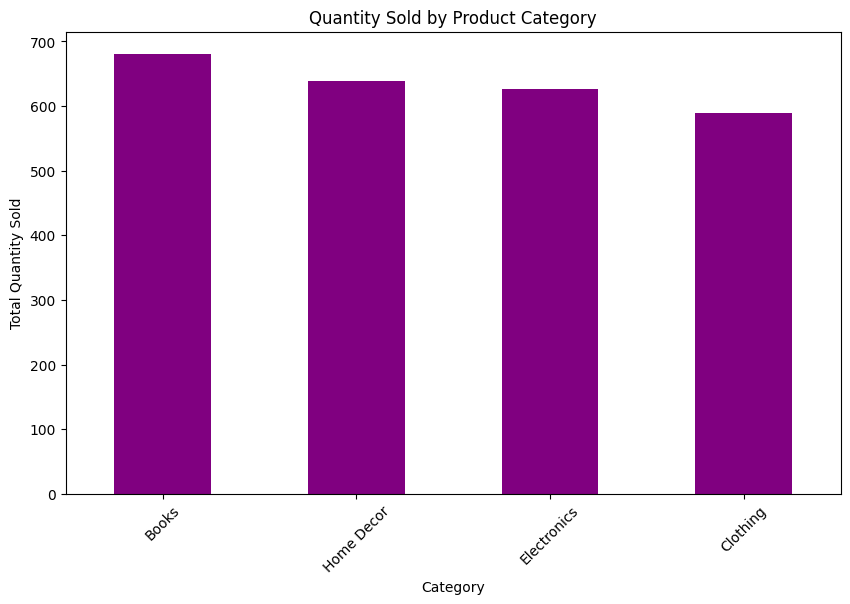

In [38]:
# 9. Quantity sold by product category
category_quantity = merged_data.groupby("Category")["Quantity"].sum().sort_values(ascending=False)
plt.figure(figsize=(10, 6))
category_quantity.plot(kind='bar', color='purple')
plt.title("Quantity Sold by Product Category")
plt.xlabel("Category")
plt.ylabel("Total Quantity Sold")
plt.xticks(rotation=45)
plt.show()

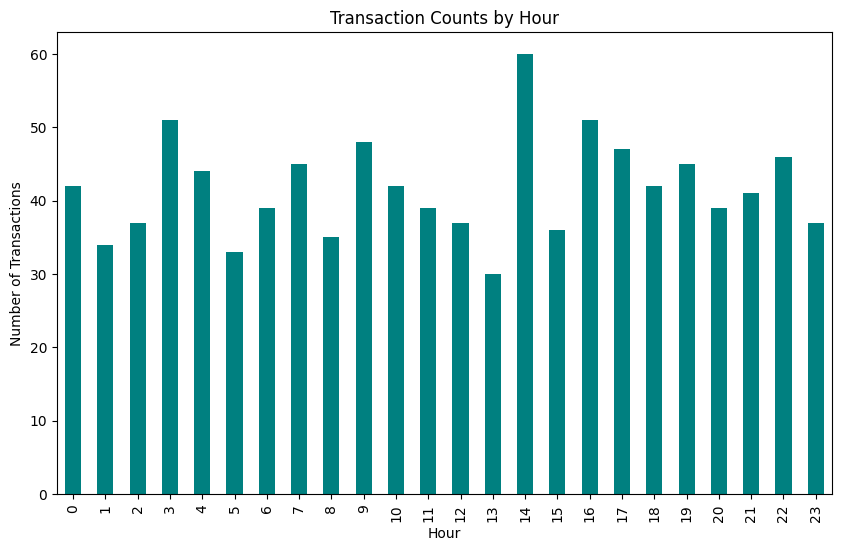

In [39]:
# 10. Transaction counts by hour
merged_data['TransactionHour'] = pd.to_datetime(merged_data['TransactionDate']).dt.hour
hourly_transactions = merged_data['TransactionHour'].value_counts().sort_index()
plt.figure(figsize=(10, 6))
hourly_transactions.plot(kind='bar', color='teal')
plt.title("Transaction Counts by Hour")
plt.xlabel("Hour")
plt.ylabel("Number of Transactions")
plt.show()

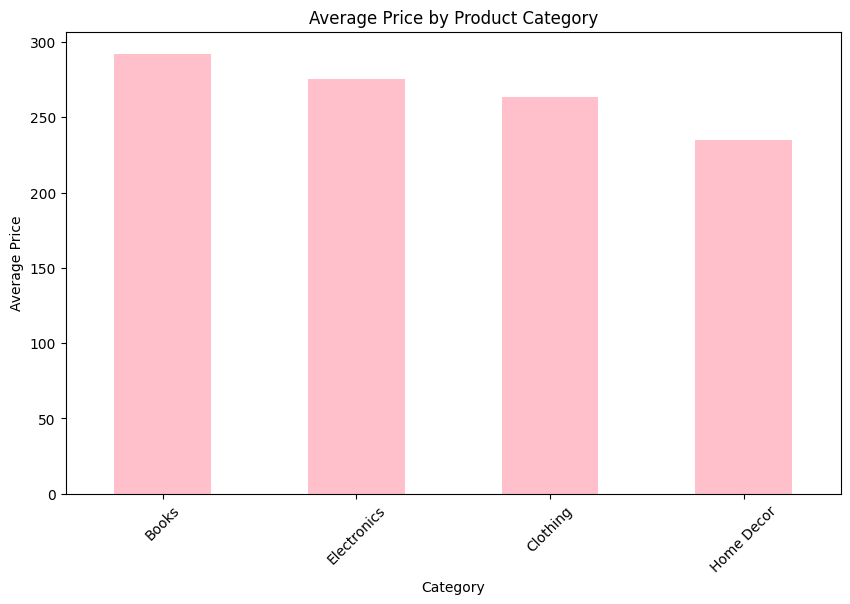

In [40]:
# 11. Average price by product category
average_price_category = products_data.groupby("Category")["Price"].mean().sort_values(ascending=False)
plt.figure(figsize=(10, 6))
average_price_category.plot(kind='bar', color='pink')
plt.title("Average Price by Product Category")
plt.xlabel("Category")
plt.ylabel("Average Price")
plt.xticks(rotation=45)
plt.show()

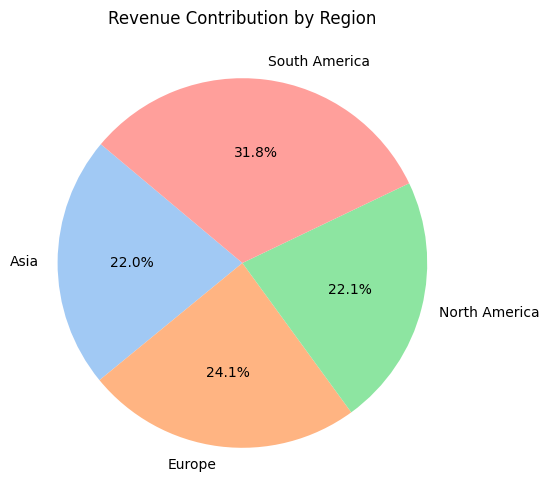

In [41]:
# 12. Percentage contribution of each region to total revenue
region_revenue_percentage = (merged_data.groupby("Region")["TotalValue"].sum() / merged_data["TotalValue"].sum()) * 100
plt.figure(figsize=(10, 6))
region_revenue_percentage.plot(kind='pie', autopct='%1.1f%%', startangle=140, colors=sns.color_palette('pastel'))
plt.title("Revenue Contribution by Region")
plt.ylabel("")
plt.show()

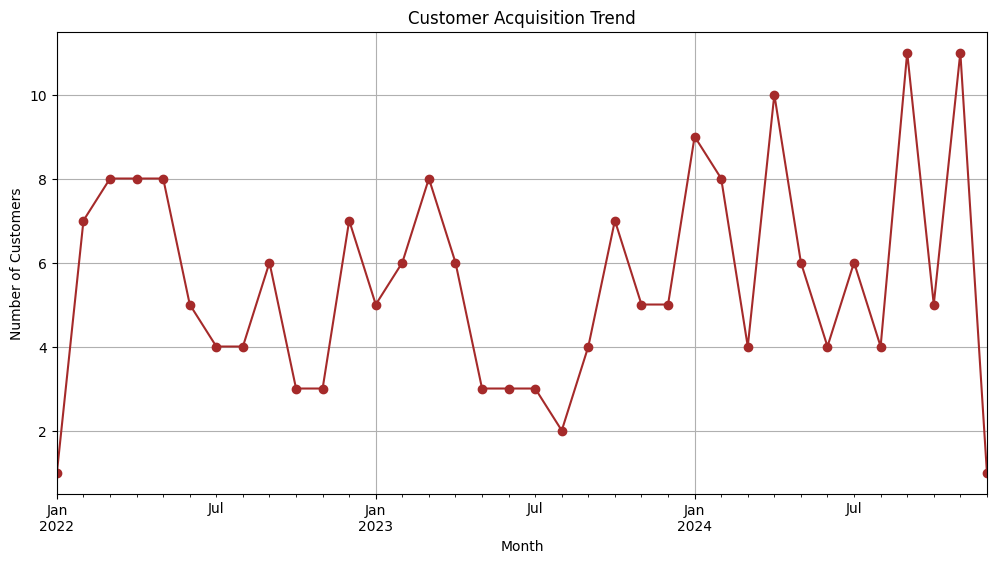

In [42]:
# 13. Customer acquisition trend over time
customers_data['SignupDate'] = pd.to_datetime(customers_data['SignupDate'])
customer_acquisition = customers_data.groupby(customers_data['SignupDate'].dt.to_period('M')).size()
plt.figure(figsize=(12, 6))
customer_acquisition.plot(kind='line', marker='o', color='brown')
plt.title("Customer Acquisition Trend")
plt.xlabel("Month")
plt.ylabel("Number of Customers")
plt.grid()
plt.show()

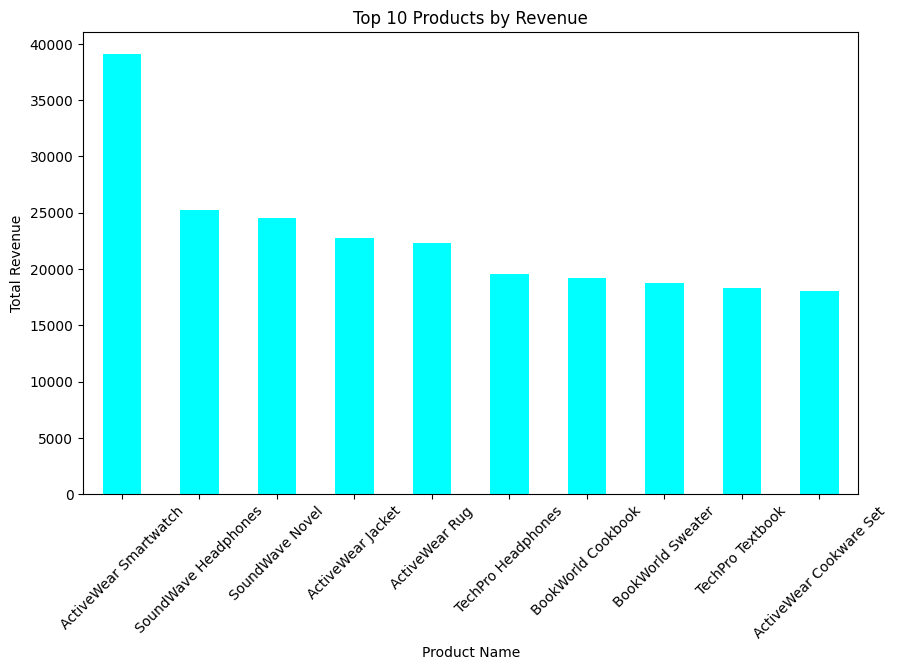

In [43]:
# 14. Products with the highest revenue
top_revenue_products = merged_data.groupby("ProductName")["TotalValue"].sum().sort_values(ascending=False).head(10)
plt.figure(figsize=(10, 6))
top_revenue_products.plot(kind='bar', color='cyan')
plt.title("Top 10 Products by Revenue")
plt.xlabel("Product Name")
plt.ylabel("Total Revenue")
plt.xticks(rotation=45)
plt.show()


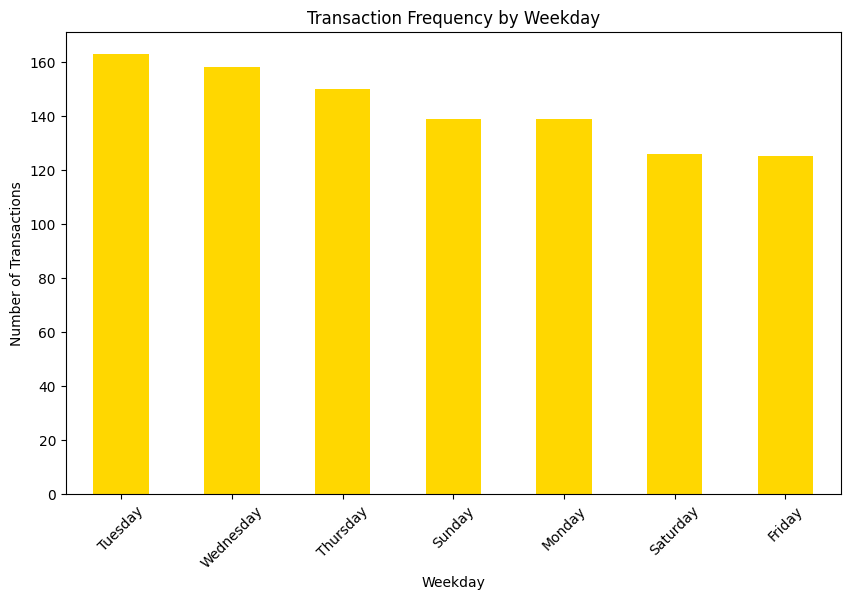

In [44]:
# 15. Frequency of transactions by weekday
merged_data['TransactionWeekday'] = pd.to_datetime(merged_data['TransactionDate']).dt.day_name()
weekday_transactions = merged_data['TransactionWeekday'].value_counts()
plt.figure(figsize=(10, 6))
weekday_transactions.plot(kind='bar', color='gold')
plt.title("Transaction Frequency by Weekday")
plt.xlabel("Weekday")
plt.ylabel("Number of Transactions")
plt.xticks(rotation=45)
plt.show()

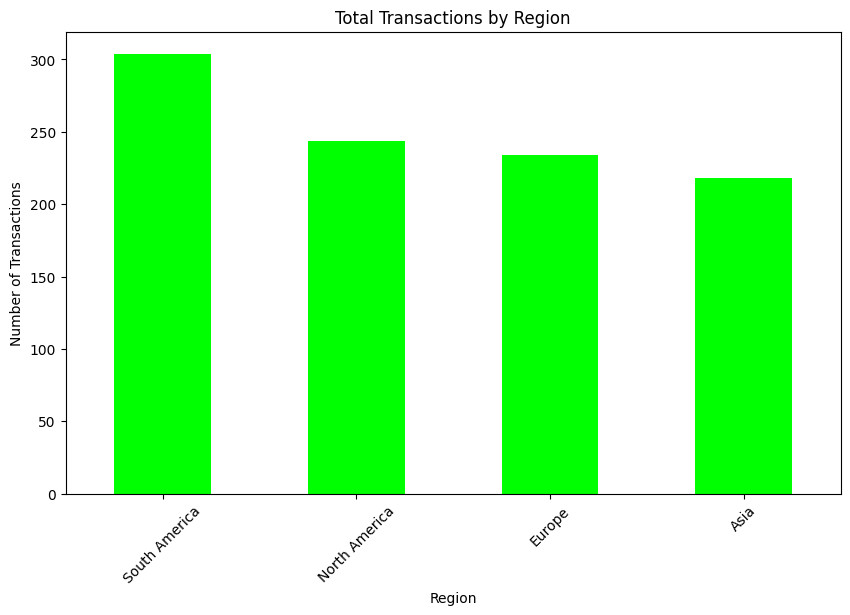

In [45]:

# 16. Top regions by total transactions
top_regions_transactions = merged_data.groupby("Region")["TransactionID"].count().sort_values(ascending=False)
plt.figure(figsize=(10, 6))
top_regions_transactions.plot(kind='bar', color='lime')
plt.title("Total Transactions by Region")
plt.xlabel("Region")
plt.ylabel("Number of Transactions")
plt.xticks(rotation=45)
plt.show()

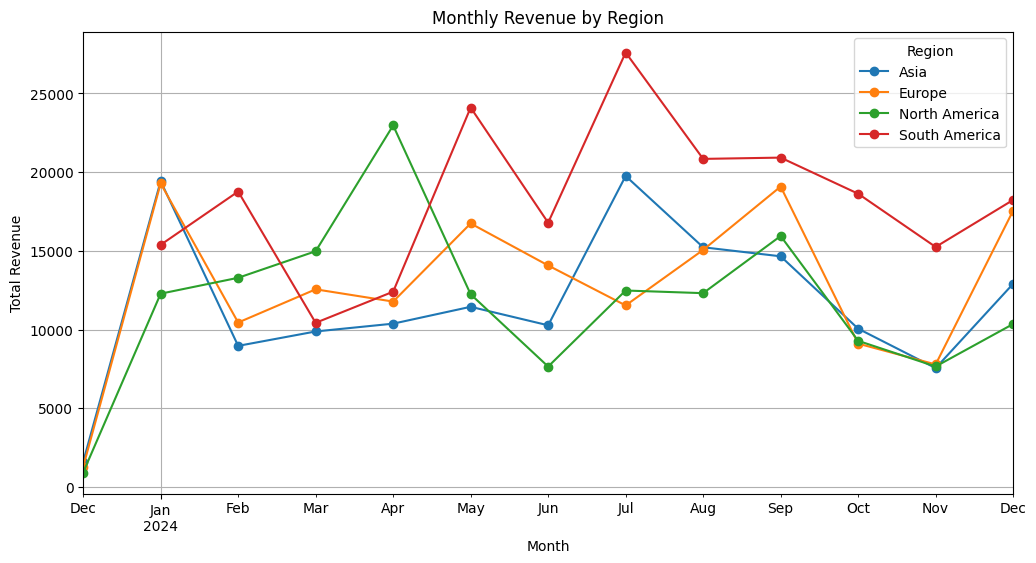

In [46]:


# 17. Monthly revenue by region
monthly_region_revenue = merged_data.groupby(["TransactionMonth", "Region"])['TotalValue'].sum().unstack()
monthly_region_revenue.plot(kind='line', figsize=(12, 6), marker='o')
plt.title("Monthly Revenue by Region")
plt.xlabel("Month")
plt.ylabel("Total Revenue")
plt.legend(title="Region")
plt.grid()
plt.show()

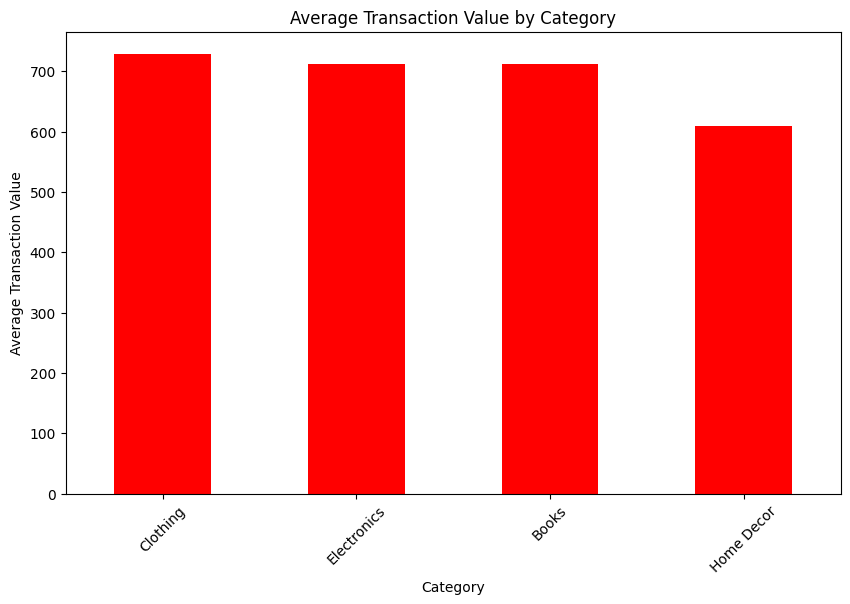

In [47]:
# 18. Average transaction value by category
avg_transaction_value_category = merged_data.groupby("Category")["TotalValue"].mean().sort_values(ascending=False)
plt.figure(figsize=(10, 6))
avg_transaction_value_category.plot(kind='bar', color='red')
plt.title("Average Transaction Value by Category")
plt.xlabel("Category")
plt.ylabel("Average Transaction Value")
plt.xticks(rotation=45)
plt.show()

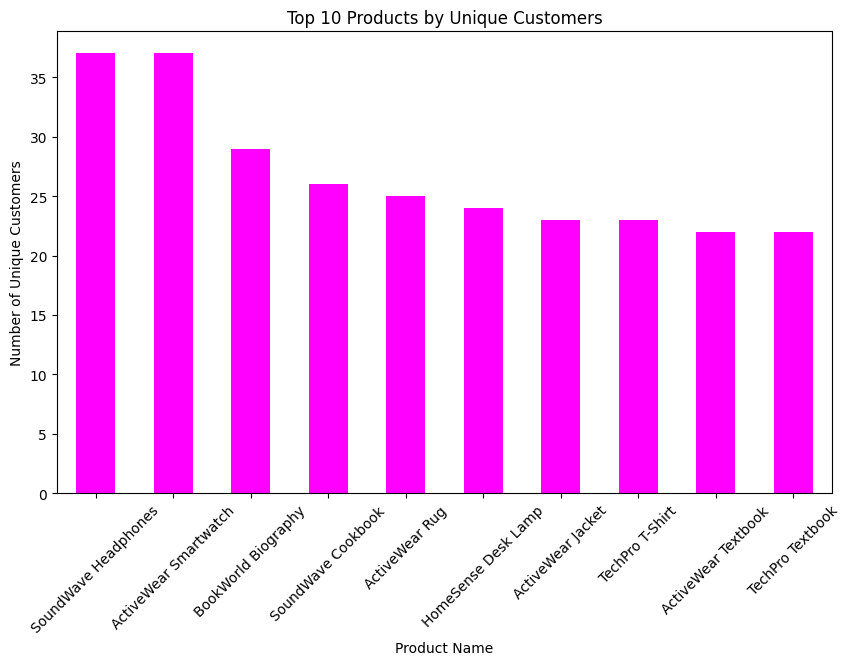

In [48]:
# 19. Products with the most unique customers
unique_customers_per_product = merged_data.groupby("ProductName")["CustomerID"].nunique().sort_values(ascending=False).head(10)
plt.figure(figsize=(10, 6))
unique_customers_per_product.plot(kind='bar', color='magenta')
plt.title("Top 10 Products by Unique Customers")
plt.xlabel("Product Name")
plt.ylabel("Number of Unique Customers")
plt.xticks(rotation=45)
plt.show()


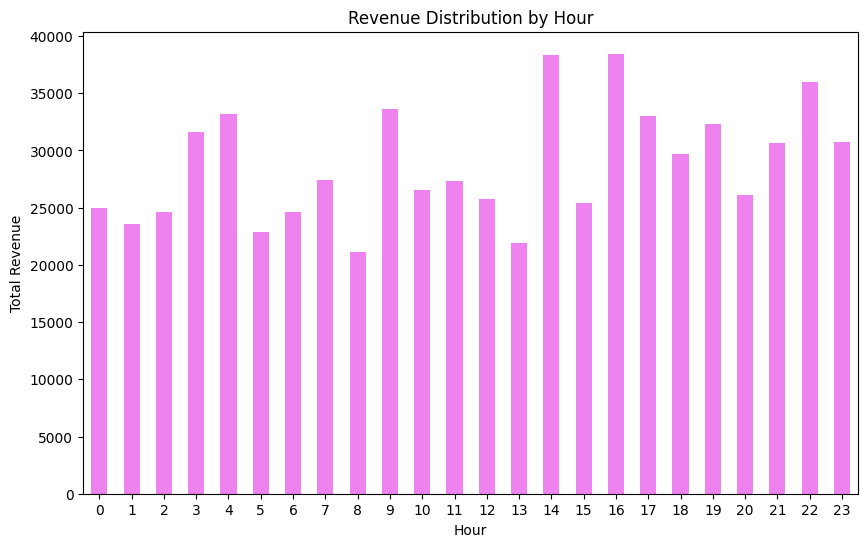

In [49]:
# 20. Revenue distribution by transaction hour
hourly_revenue = merged_data.groupby("TransactionHour")["TotalValue"].sum()
plt.figure(figsize=(10, 6))
hourly_revenue.plot(kind='bar', color='violet')
plt.title("Revenue Distribution by Hour")
plt.xlabel("Hour")
plt.ylabel("Total Revenue")
plt.xticks(rotation=0)
plt.show()